In [1]:
# Imports e preâmbulos
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils #pip install imutils
import os

%matplotlib inline

print("Versão da OpenCV ", cv2.__version__)
print("Estamos no diretório ", os.getcwd())
print("Listagem: ", os.listdir())

# Imports do color checker detection

from collections import OrderedDict

import colour
from colour.plotting import *

from colour_checker_detection import (
    EXAMPLES_RESOURCES_DIRECTORY,
    colour_checkers_coordinates_segmentation,
    detect_colour_checkers_segmentation)
from colour_checker_detection.detection.segmentation import (
    adjust_image)

import glob




Versão da OpenCV  4.4.0
Estamos no diretório  /Users/mirwox/Dropbox/Insper/2016/Robotics/src/color_calibration
Listagem:  ['padrao_perto_parede_02.png', 'padrao_perto_parede.png', 'padrao_chao_meio_sala.png', 'visaorobo_puxa_vermelho.mp4', 'Calibracao.ipynb', '.gitattributes', 'padrao_estante.png', '.ipynb_checkpoints', '.git', 'padrao_gabarito.png']


In [2]:

# Função auxiliar para plot

def multiplot(imgs, legenda):
    """ Função """
    fig, axes = plt.subplots(1,len(imgs), figsize=(24,8))    
    fig.suptitle(legenda)
    if len(imgs)==1: # Peculiaridade do subplot. Não é relevante para a questão
        ax = axes
        ax.imshow(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB))
        return
    for i in range(len(imgs)):
        axes[i].imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))

def multiplot_gray(imgs, legenda):
    """ Função que plota n imagens grayscale em linha"""
    fig, axes = plt.subplots(1,len(imgs), figsize=(26,8))    
    fig.suptitle(legenda)
    if len(imgs)==1: # Peculiaridade do subplot. Não é relevante para a questão
        ax = axes
        ax.imshow(cv2.cvtColor(imgs[0],  vmin=0, vmax=255, cmap="Greys_r"))
        return
    for i in range(len(imgs)):
        axes[i].imshow(imgs[i], vmin=0, vmax=255, cmap="Greys_r")

<img src="./padrao_gabarito.png" width=33%>

In [3]:
padroes = "padrao_chao_meio_sala.png  padrao_perto_parede.png padrao_estante.png         padrao_perto_parede_02.png".split()

In [4]:
bgr = [cv2.imread(p) for p in padroes]

In [5]:
hsvs = [cv2.cvtColor(img, cv2.COLOR_BGR2HSV) for img in bgr]

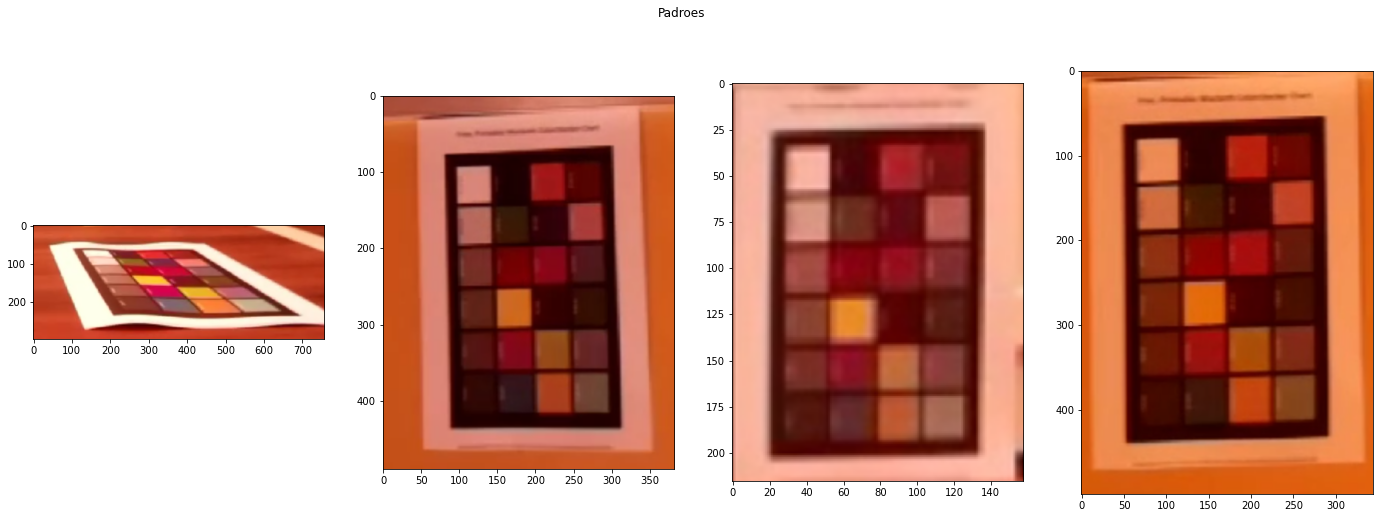

In [6]:
multiplot(bgr, "Padroes")

In [7]:
menor = [0, 0, 0 ]
maior = [180, 255, 150]

def filter(HSV, menor, maior):
    cor1 = np.array(menor, dtype=np.uint8)
    cor2 = np.array(maior, dtype=np.uint8)
    return cv2.inRange(HSV, cor1, cor2)

In [8]:
black = [filter(h, menor, maior) for h in hsvs]

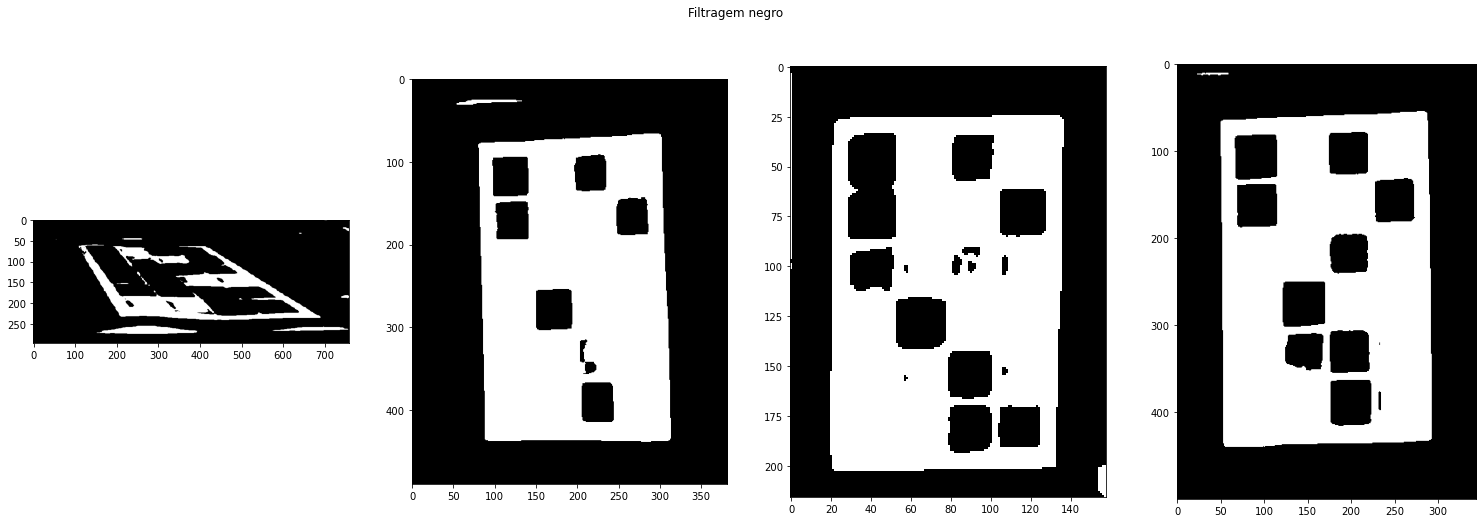

In [9]:
multiplot_gray(black, "Filtragem negro")

In [10]:
grays = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in bgr]

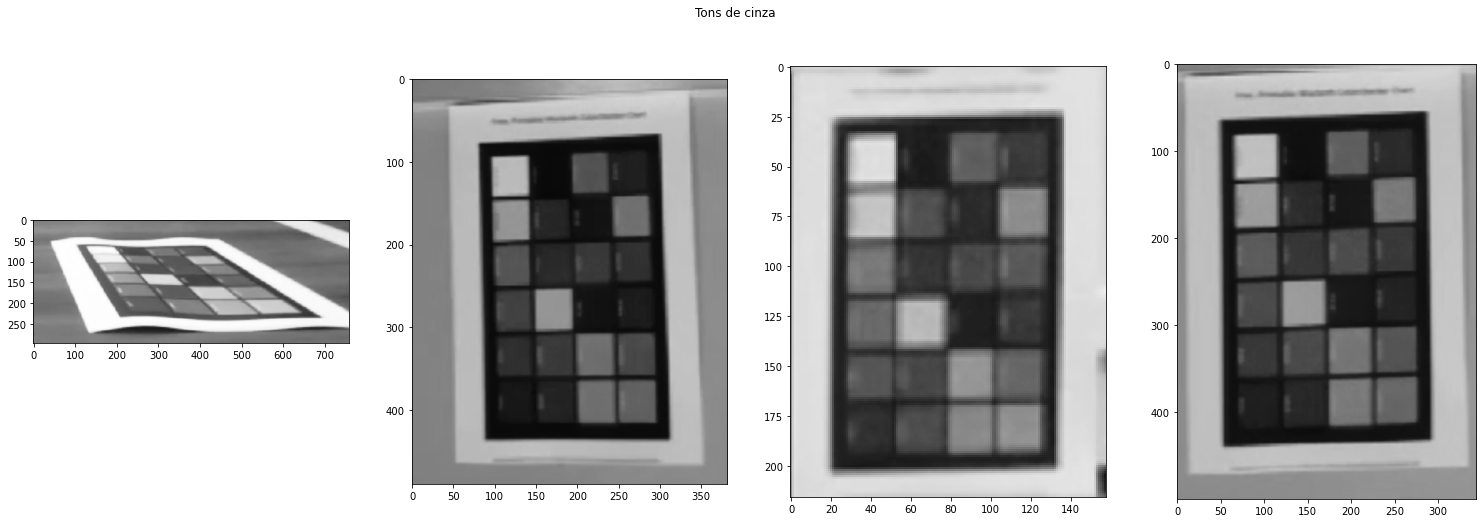

In [11]:
multiplot_gray(grays, "Tons de cinza")

In [12]:
tup = [cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) for img in grays]
tup2 = [cv2.threshold(img,0,255,cv2.THRESH_OTSU) for img in grays]

In [13]:
thresh = [img[1] for img in tup]
thresh2 = [img[1] for img in tup2]

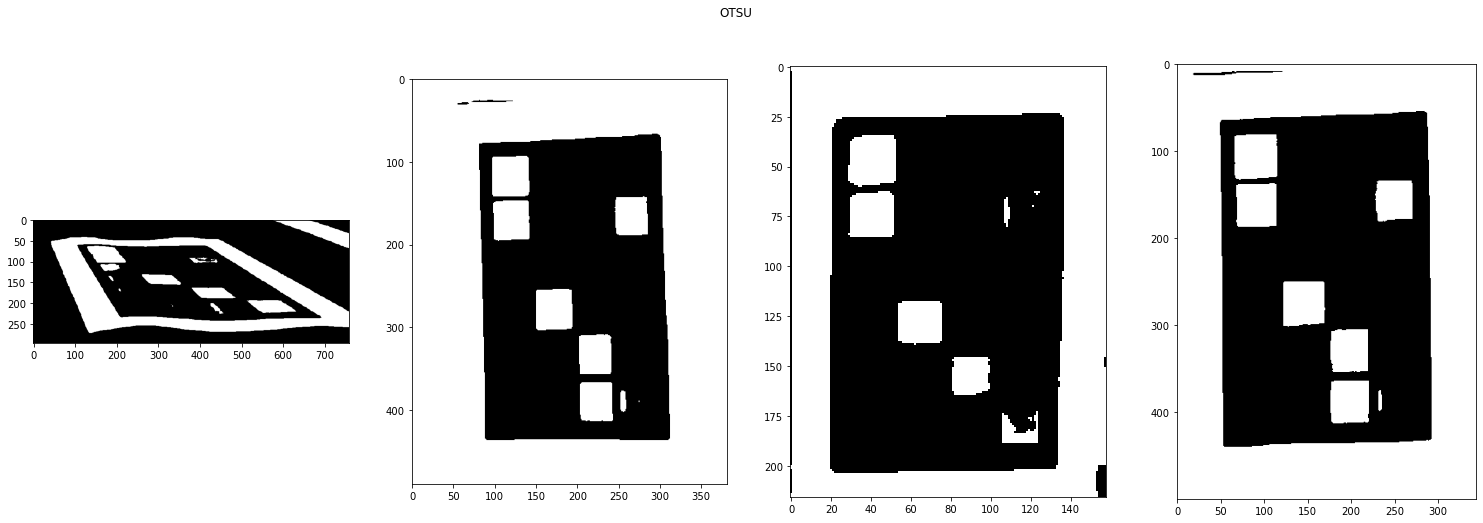

In [14]:
multiplot_gray(thresh, "OTSU")

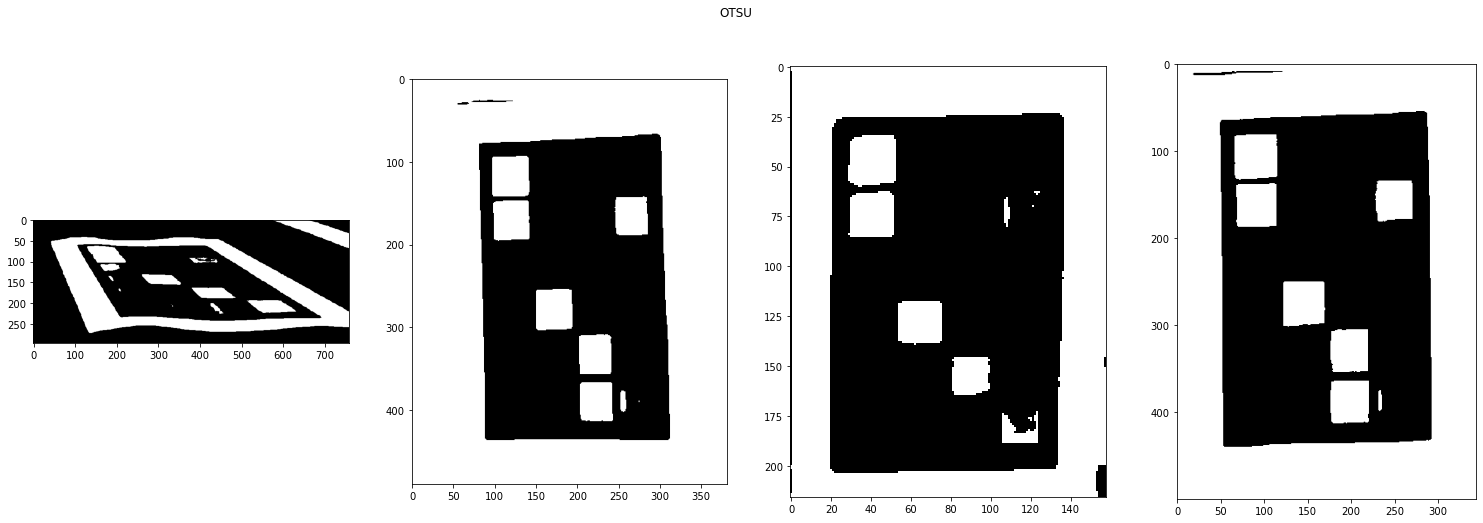

In [15]:
multiplot_gray(thresh2, "OTSU")

## Usando a biblioteca colour



In [16]:
colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.8.2 | packaged by conda-forge | (default, Apr 24 2020,     *
*   07:56:27)                                                                 *
*                [Clang 9.0.1 ]                                               *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.3.15                                                       *
*       colour-checker-detection : 0.1.1                                      *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.8.0                                                       *
*       matplotlib : 3.2.1              

In [17]:
colour_style();

In [18]:
EXAMPLES_RESOURCES_DIRECTORY = "."

/Users/mirwox/anaconda3/envs/robotica/lib/python3.8/site-packages/colour/utilities/verbose.py:235: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


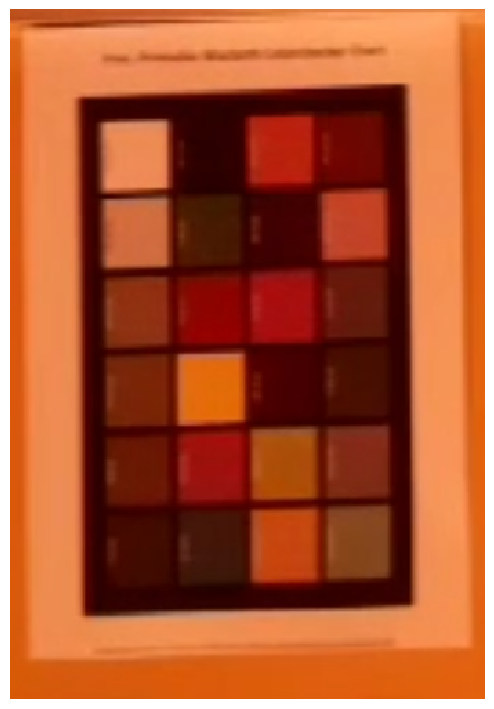

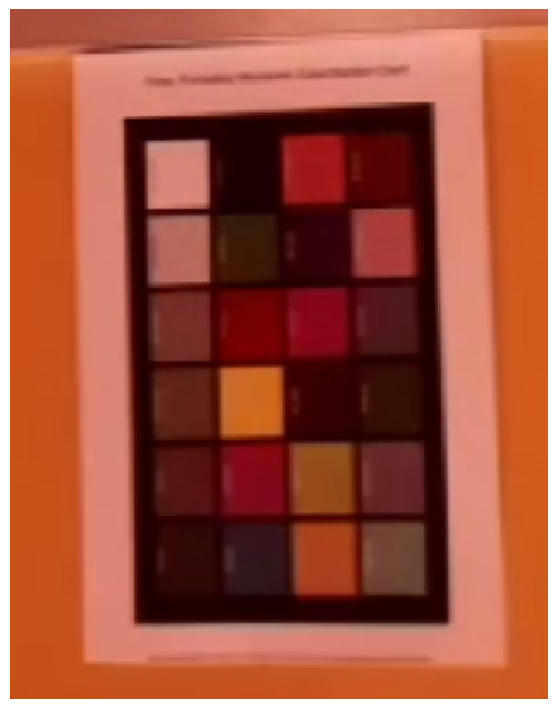

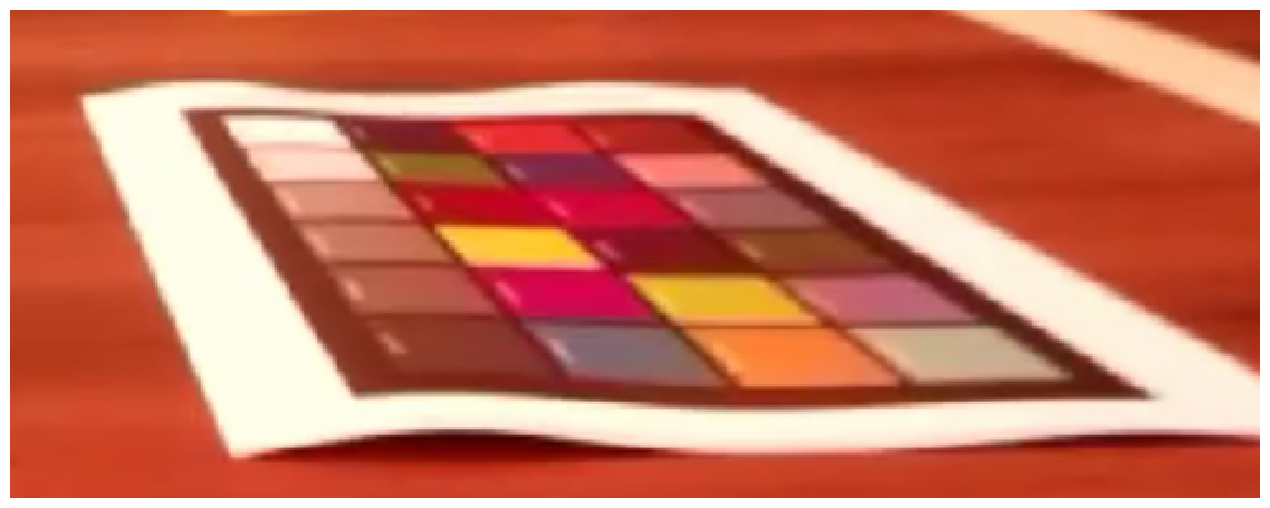

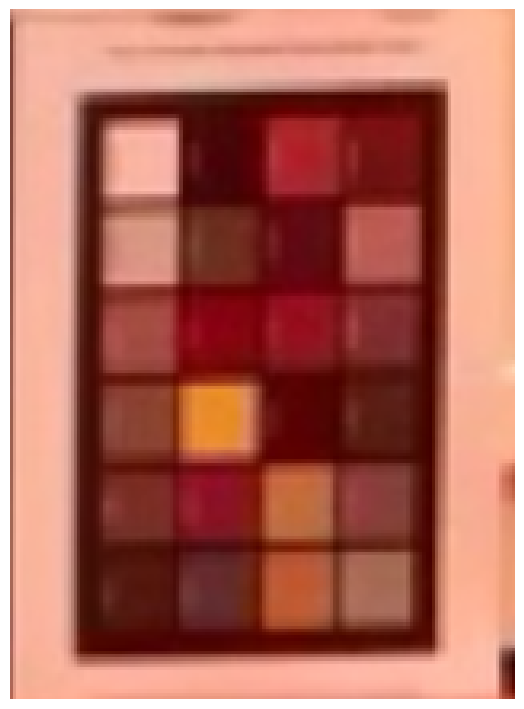

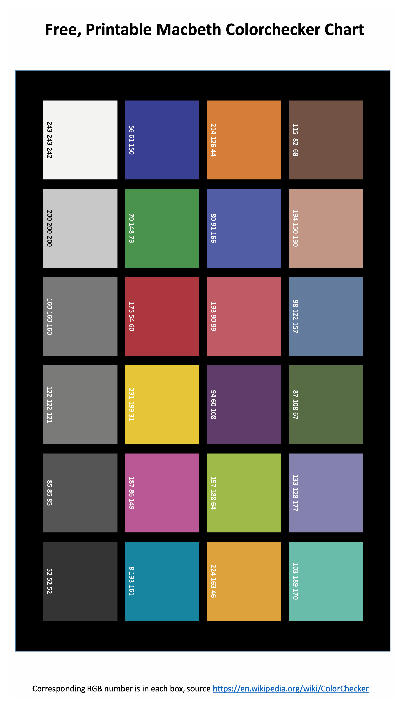

In [19]:
COLOUR_CHECKER_IMAGE_PATHS = glob.glob(
    os.path.join(EXAMPLES_RESOURCES_DIRECTORY,'*.png'))

COLOUR_CHECKER_IMAGES = [
    colour.cctf_decoding(colour.io.read_image(path))
    for path in COLOUR_CHECKER_IMAGE_PATHS
]

for image in COLOUR_CHECKER_IMAGES:
    plot_image(colour.cctf_encoding(image));

In [20]:
COLOUR_CHECKER_IMAGE_PATHS 

['./padrao_perto_parede_02.png',
 './padrao_perto_parede.png',
 './padrao_chao_meio_sala.png',
 './padrao_estante.png',
 './padrao_gabarito.png']

In [21]:
EXAMPLES_RESOURCES_DIRECTORY

'.'

Code taken from [https://github.com/colour-science/colour-checker-detection/blob/develop/colour_checker_detection/examples/examples_detection.ipynb](https://github.com/colour-science/colour-checker-detection/blob/develop/colour_checker_detection/examples/examples_detection.ipynb/)

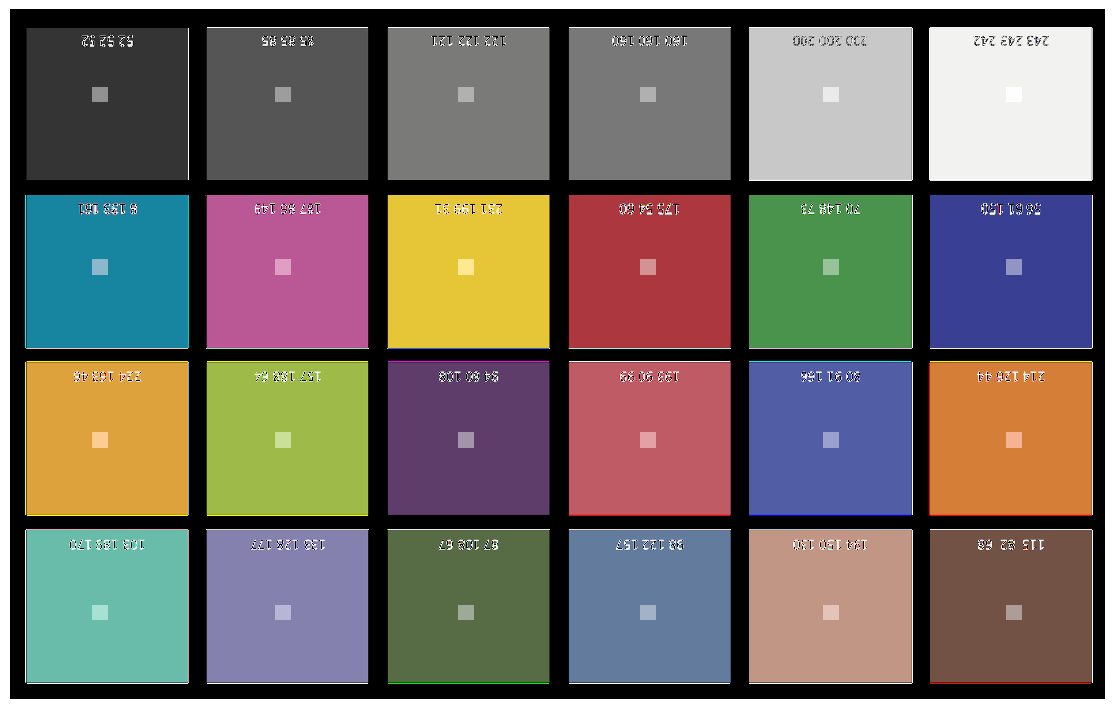

In [22]:
SWATCHES = []

for image in COLOUR_CHECKER_IMAGES:
    for swatches, colour_checker, masks in detect_colour_checkers_segmentation(
        image, additional_data=True):
        SWATCHES.append(swatches)

        # Using the additional data to plot the colour checker and masks.
        masks_i = np.zeros(colour_checker.shape)
        for i, mask in enumerate(masks):
            masks_i[mask[0]:mask[1], mask[2]:mask[3], ...] = 1
        plot_image(
            colour.cctf_encoding(
                np.clip(colour_checker + masks_i * 0.25, 0, 1)));

## Color fitting

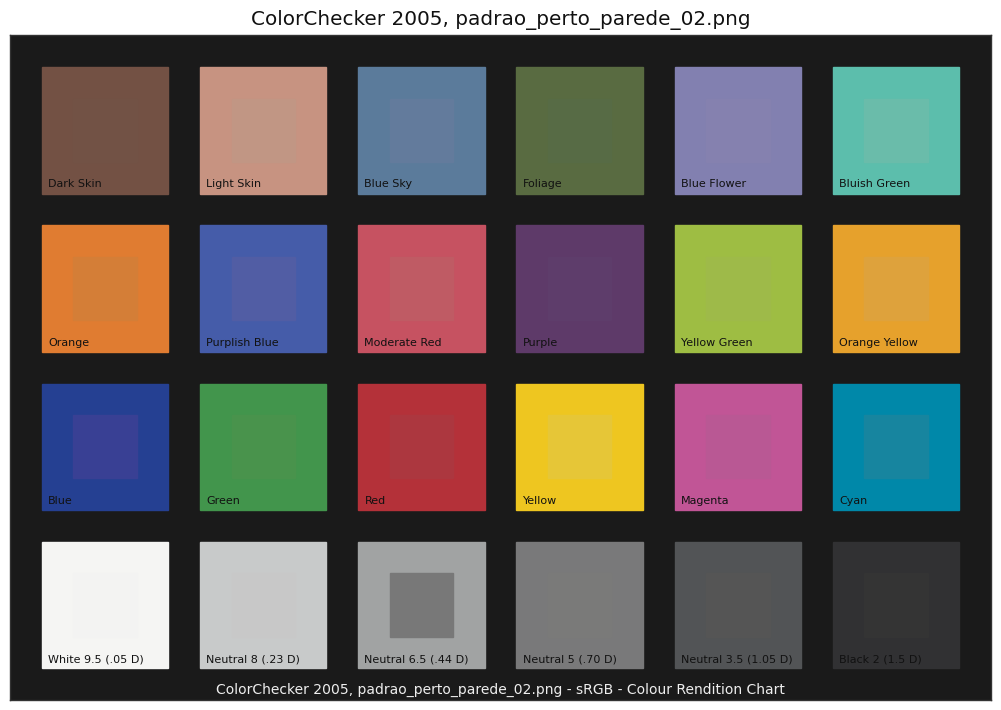

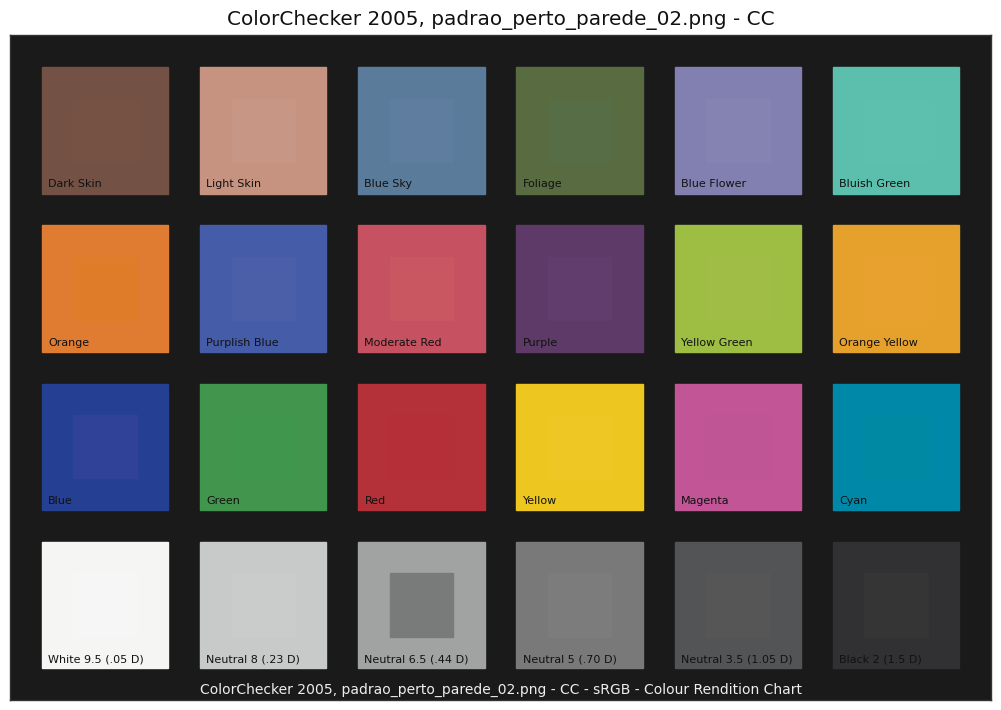

ValueError: cannot reshape array of size 688000 into shape (3)

In [23]:
D65 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['D65']
REFERENCE_COLOUR_CHECKER = colour.COLOURCHECKERS['ColorChecker 2005']

REFERENCE_SWATCHES = colour.XYZ_to_RGB(
        colour.xyY_to_XYZ(list(REFERENCE_COLOUR_CHECKER.data.values())),
        REFERENCE_COLOUR_CHECKER.illuminant, D65,
        colour.RGB_COLOURSPACES['sRGB'].XYZ_to_RGB_matrix)

for i, swatches in enumerate(SWATCHES):
    swatches_xyY = colour.XYZ_to_xyY(colour.RGB_to_XYZ(
        swatches, D65, D65, colour.RGB_COLOURSPACES['sRGB'].RGB_to_XYZ_matrix))

    colour_checker = colour.characterisation.ColourChecker(
        os.path.basename(COLOUR_CHECKER_IMAGE_PATHS[i]),
        OrderedDict(zip(REFERENCE_COLOUR_CHECKER.data.keys(), swatches_xyY)),
        D65)
    
    plot_multi_colour_checkers(
        [REFERENCE_COLOUR_CHECKER, colour_checker])
    
    swatches_f = colour.colour_correction(swatches, swatches, REFERENCE_SWATCHES)
    swatches_f_xyY = colour.XYZ_to_xyY(colour.RGB_to_XYZ(
        swatches_f, D65, D65, colour.RGB_COLOURSPACES['sRGB'].RGB_to_XYZ_matrix))
    colour_checker = colour.characterisation.ColourChecker(
        '{0} - CC'.format(os.path.basename(COLOUR_CHECKER_IMAGE_PATHS[i])),
        OrderedDict(zip(REFERENCE_COLOUR_CHECKER.data.keys(), swatches_f_xyY)),
        D65)
    
    plot_multi_colour_checkers(
        [REFERENCE_COLOUR_CHECKER, colour_checker])

    plot_image(colour.cctf_encoding(
        colour.colour_correction(
            COLOUR_CHECKER_IMAGES[i], swatches, REFERENCE_SWATCHES)));

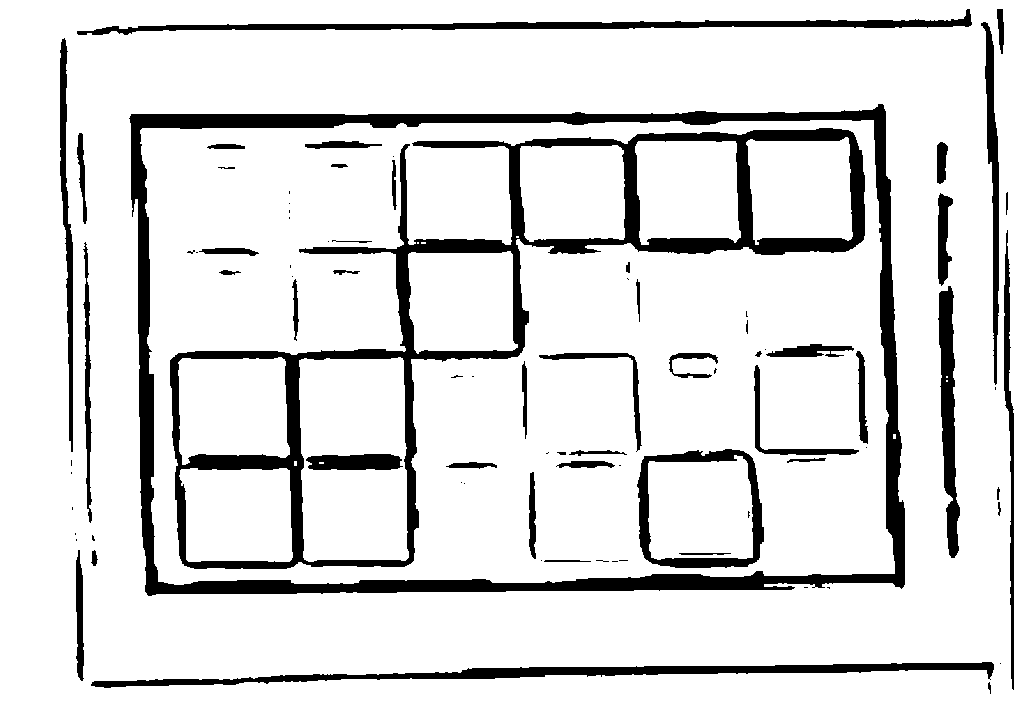

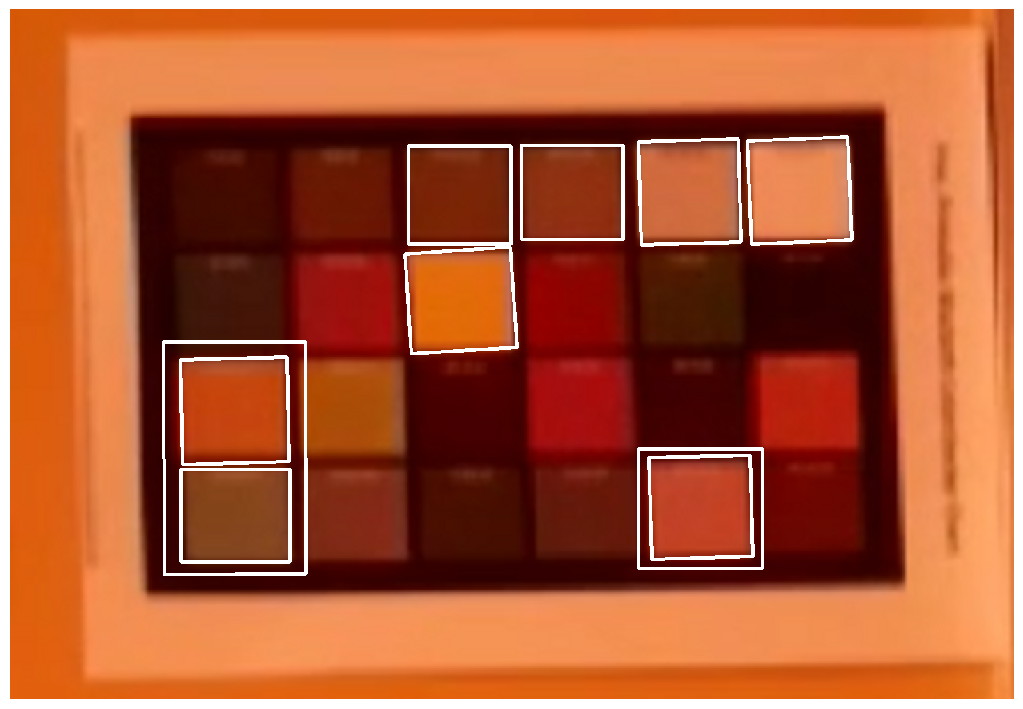

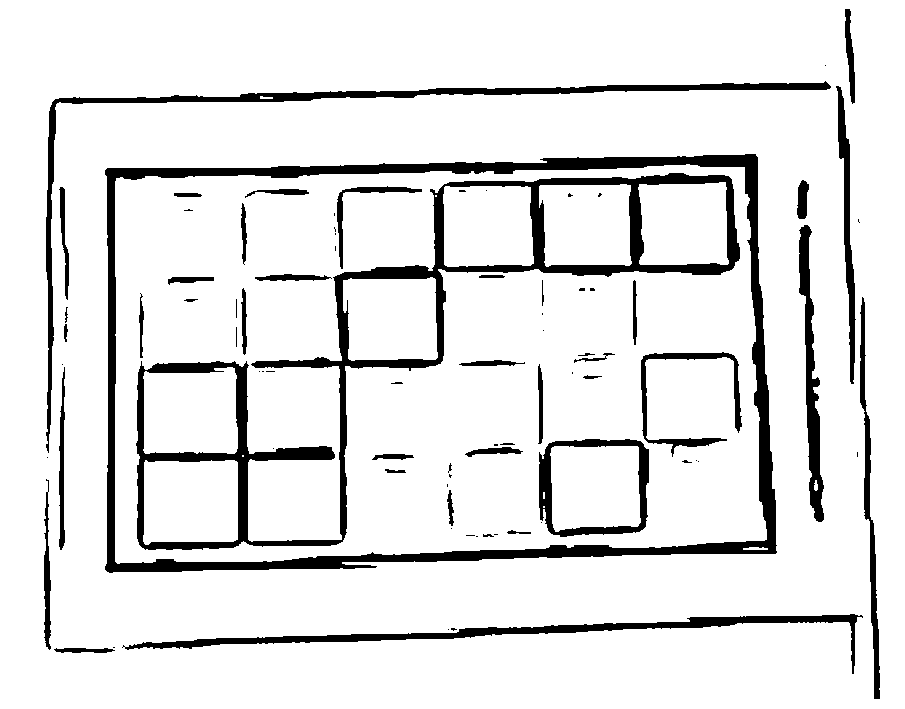

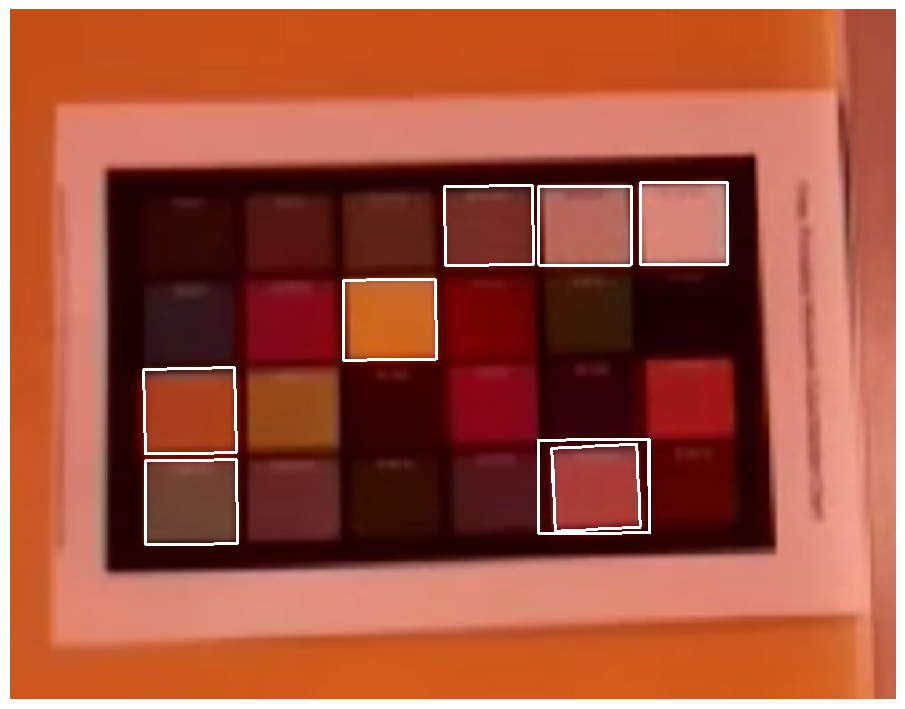

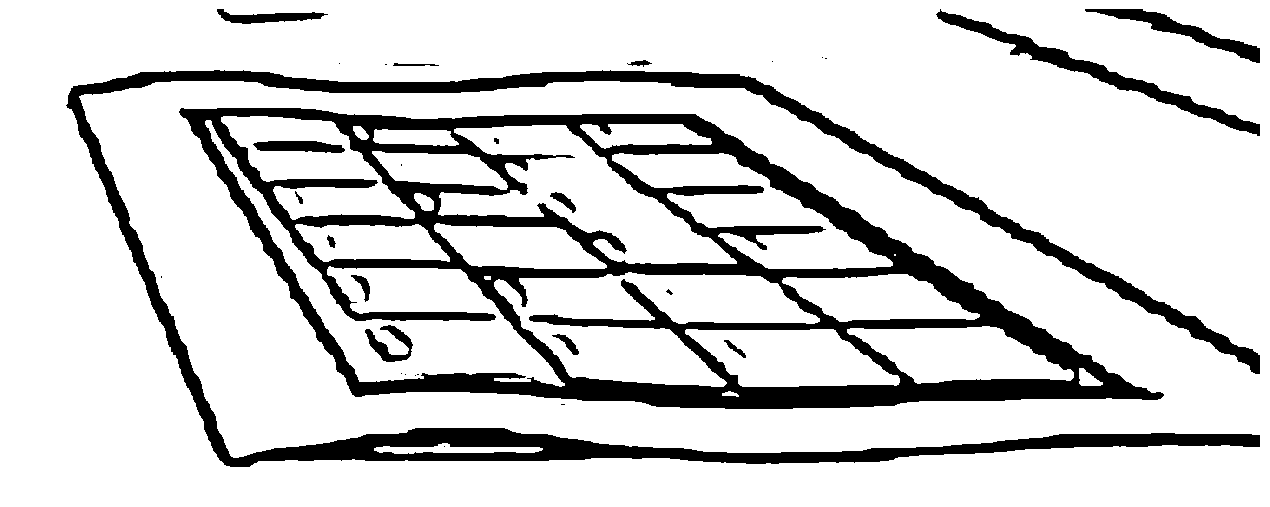

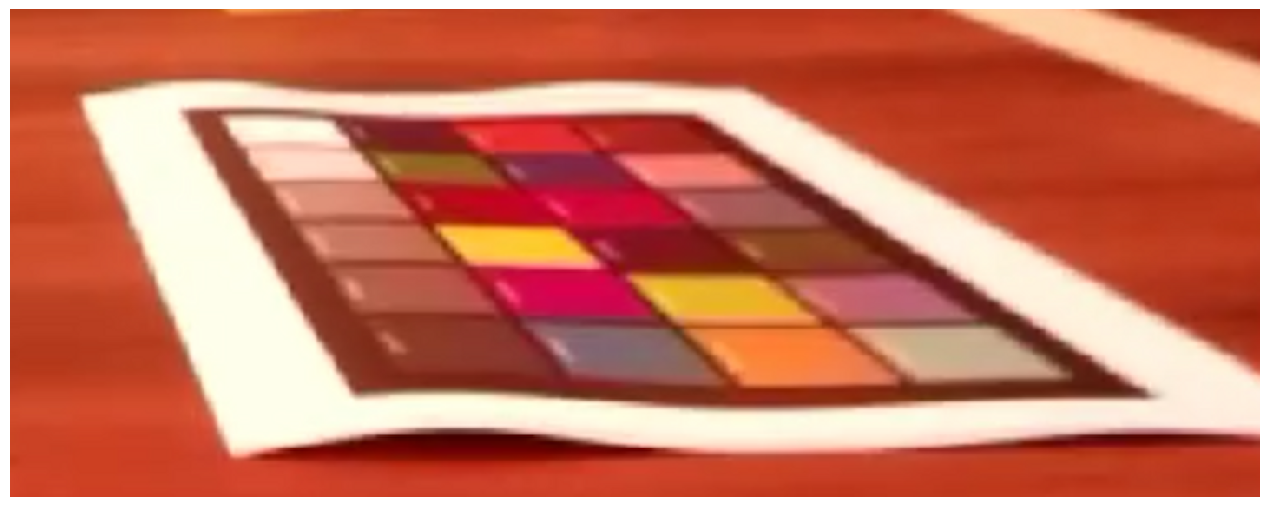

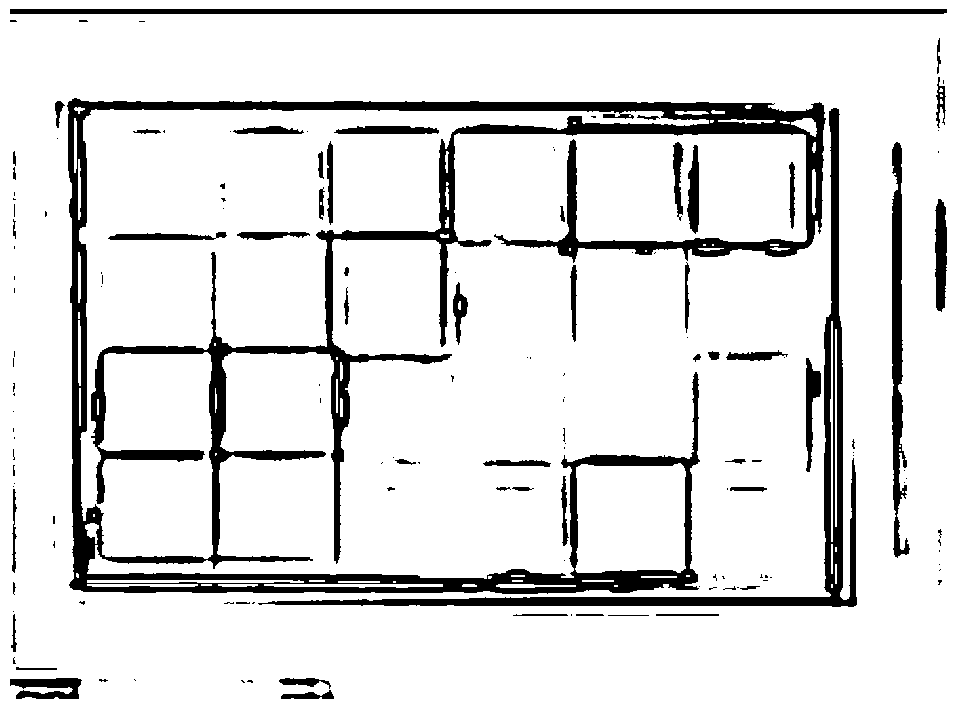

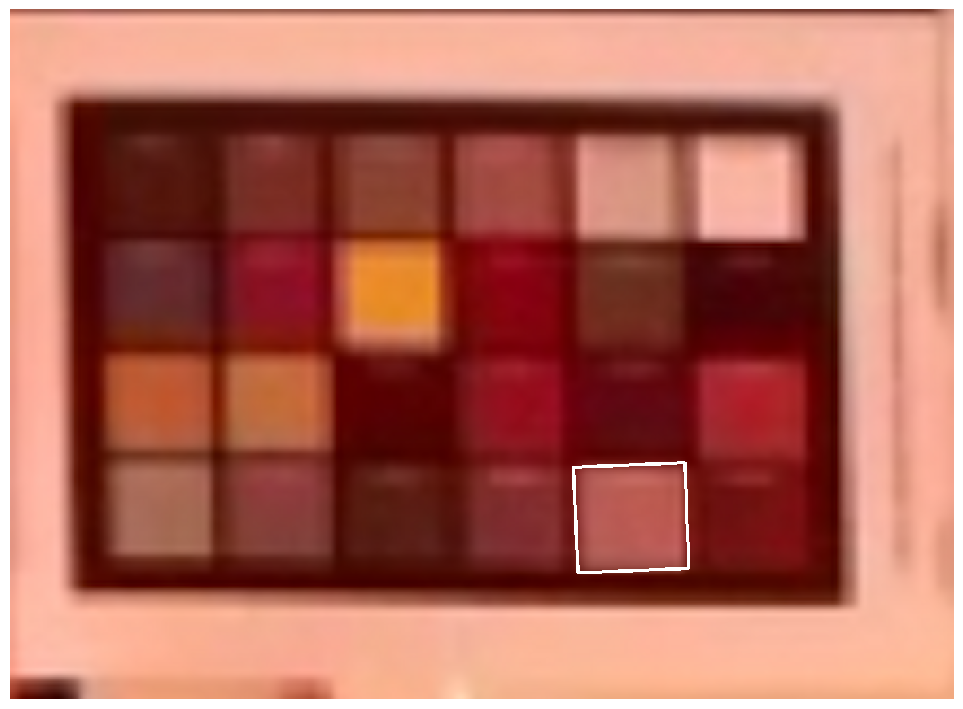

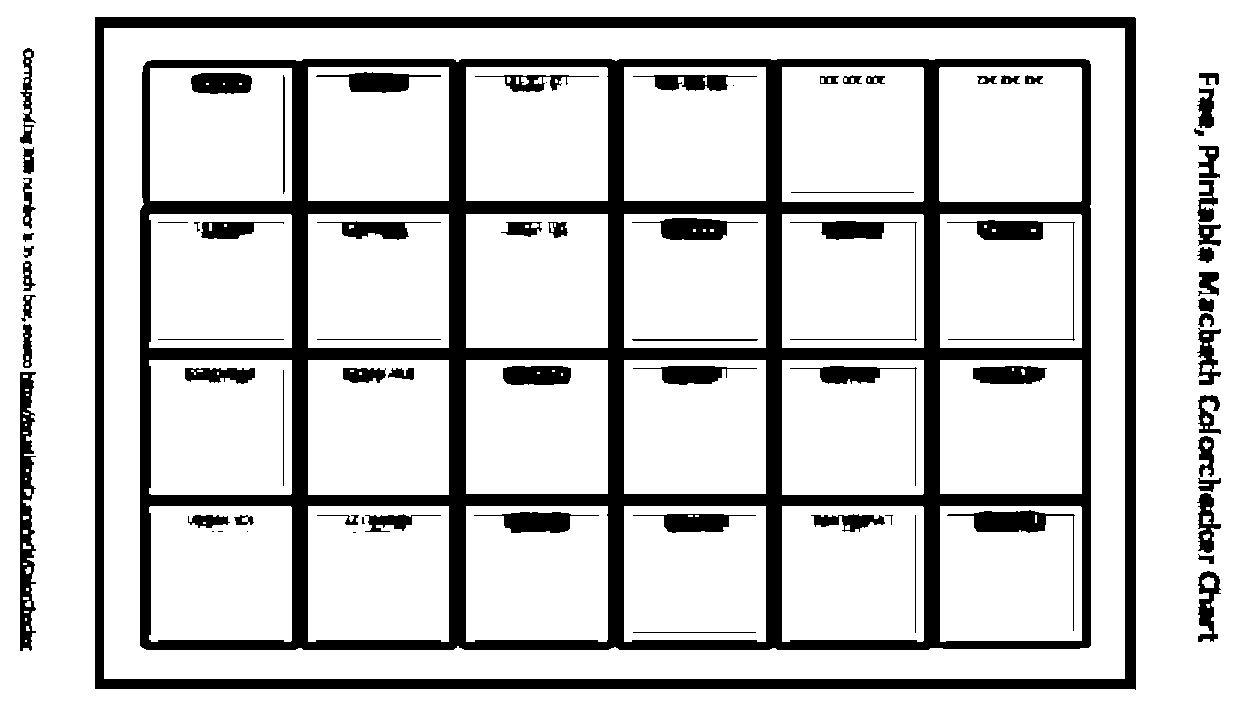

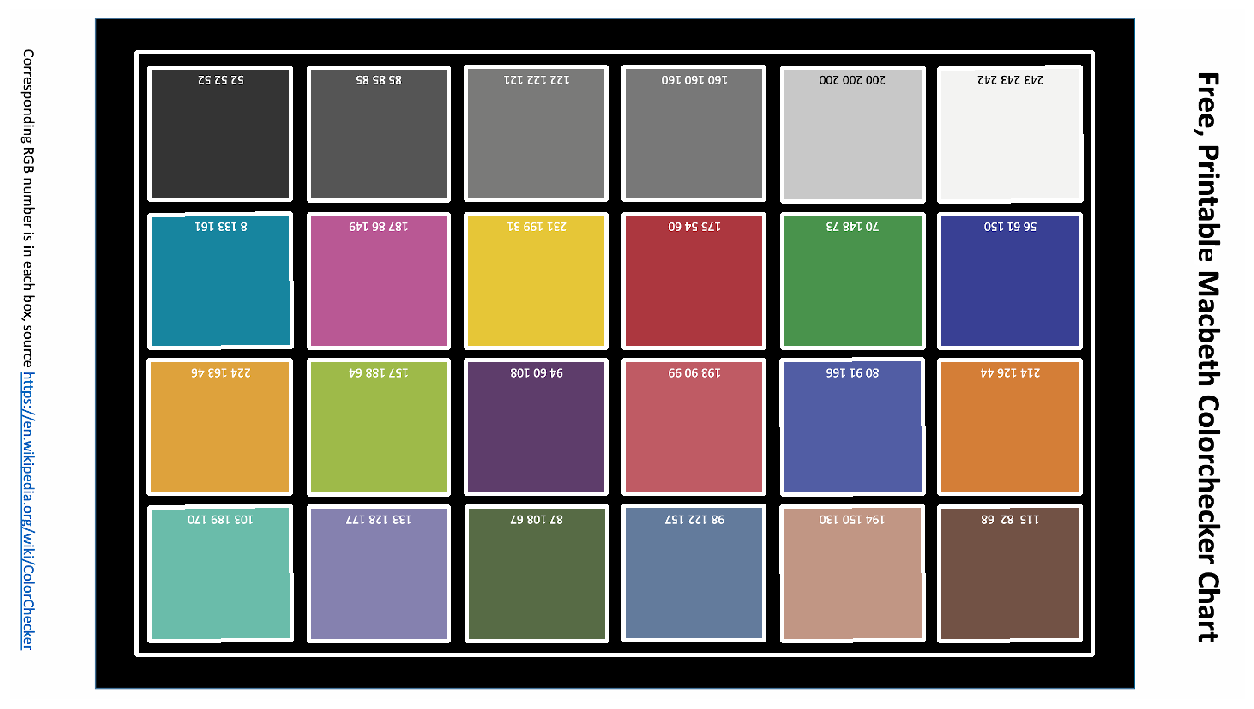

In [24]:


for image in COLOUR_CHECKER_IMAGES:
    colour_checkers, clusters, swatches, segmented_image = (
        colour_checkers_coordinates_segmentation(
            image, additional_data=True))
    
    image_a = adjust_image(image)

    plot_image(colour.cctf_encoding(segmented_image), text_kwargs={
        'text': 'Segmented Image',
        'color': 'black'
    })
    
    cv2.drawContours(image_a, swatches, -1, (1, 0, 1), 3)
    cv2.drawContours(image_a, clusters, -1, (0, 1, 1), 3)

    plot_image(colour.cctf_encoding(image_a), text_kwargs={
        'text': 'Swatches & Clusters',
        'color': 'white'
    });

